In [13]:
import pandas as pd

data = {
    'name': ['Fernando Pessoa', 'T.S. Eliot', 'Pablo Neruda', 'Sophia de Mello', 'Walt Whitman'],
    'country': ['Portugal', 'USA', 'Chile', 'Portugal', 'USA'],
    'birth_year': [1888, 1888, 1904, 1919, 1819]
}

df = pd.DataFrame(data)
df

,name,country,birth_year
0,Fernando Pessoa,Portugal,1888
1,T.S. Eliot,USA,1888
2,Pablo Neruda,Chile,1904
3,Sophia de Mello,Portugal,1919
4,Walt Whitman,USA,1819


In [27]:
df['age_in_1950'] = 1950 - df['birth_year']
df

,name,country,birth_year,age_in_1950
0,Fernando Pessoa,Portugal,1888,62
1,T.S. Eliot,USA,1888,62
2,Pablo Neruda,Chile,1904,46
3,Sophia de Mello,Portugal,1919,31
4,Walt Whitman,USA,1819,131


In [31]:
df.sort_values('age_in_1950', ascending=False)

,name,country,birth_year,age_in_1950
4,Walt Whitman,USA,1819,131
0,Fernando Pessoa,Portugal,1888,62
1,T.S. Eliot,USA,1888,62
2,Pablo Neruda,Chile,1904,46
3,Sophia de Mello,Portugal,1919,31


In [37]:
df[(df['country'] == 'Portugal') & (df['age_in_1950'] > 60)]

,name,country,birth_year,age_in_1950
0,Fernando Pessoa,Portugal,1888,62


In [67]:
# 🔹 Exercise 2: Indexing with .loc[] and .iloc[]
# Use .loc[] to return the name and age_in_1950 of all poets from Portugal.

df[df['country'] == 'Portugal']
df.loc[df['country'] == 'Portugal', ['name','age_in_1950']]

,name,age_in_1950
0,Fernando Pessoa,62
3,Sophia de Mello,31


In [83]:
# Use .iloc[] to return the first three rows and only the first two columns.

df.iloc[0:3, 0:2]

,name,country
0,Fernando Pessoa,Portugal
1,T.S. Eliot,USA
2,Pablo Neruda,Chile


In [107]:
# Use .loc[] to set 'country' to 'USA 🇺🇸' for all poets who were born before 1900 and are from USA.

df.loc[(df['country'] == 'USA') & (df['birth_year'] < 1900)]['country'] = 'USA 🇺🇸'
df

,name,country,birth_year,age_in_1950
0,Fernando Pessoa,Portugal,1888,62
1,T.S. Eliot,USA 🇺🇸,1888,62
2,Pablo Neruda,Chile,1904,46
3,Sophia de Mello,Portugal,1919,31
4,Walt Whitman,USA 🇺🇸,1819,131


In [117]:
# 🧠 Challenge 1: Average age per country

grouped = df.groupby('country')['age_in_1950'].mean()
grouped

country
Chile       46.0
Portugal    46.5
USA 🇺🇸      96.5
Name: age_in_1950, dtype: float64

In [119]:
# 🧠 Challenge 2: Number of poets per country
df.groupby('country')['name'].size()

country
Chile       1
Portugal    2
USA 🇺🇸      2
Name: name, dtype: int64

In [131]:
# 🧠 Challenge 3: Group and aggregate

df.groupby('country')['age_in_1950'].agg(['mean', 'max'])


,mean,max
country,,
Chile,46.0,46
Portugal,46.5,62
USA 🇺🇸,96.5,131


In [133]:
df.groupby('country').agg(
    avg_age_1950 = ('age_in_1950', 'mean'),
    max_age_1950 = ('age_in_1950', 'max'),
    num_poets = ('name', 'count')
).reset_index()

,country,avg_age_1950,max_age_1950,num_poets
0,Chile,46.0,46,1
1,Portugal,46.5,62,2
2,USA 🇺🇸,96.5,131,2


In [173]:
# 🔹 Challenge 4: Group + Aggregate + Sort
(
df.groupby('country').agg(
    avg_age_1950 = ('age_in_1950', 'mean'),
    max_age_1950 = ('age_in_1950', 'max'),
    num_poets = ('name', 'count'),
)
.reset_index()
.sort_values(by=['num_poets', 'avg_age_1950'], ascending=[False, True])
    
)

,country,avg_age_1950,max_age_1950,num_poets
1,Portugal,46.5,62,2
2,USA 🇺🇸,96.5,131,2
0,Chile,46.0,46,1


In [184]:
#🔹 Challenge 5: Filter aggregated results

(

df.groupby('country').agg(
    avg_age_1950 = ('age_in_1950', 'mean'),
    max_age_1950 = ('age_in_1950', 'max'),
    num_poets = ('name', 'count'),
)
.reset_index()
.sort_values(by=['num_poets', 'avg_age_1950'], ascending=[False, True])
.query('num_poets > 1')
)

,country,avg_age_1950,max_age_1950,num_poets
1,Portugal,46.5,62,2
2,USA 🇺🇸,96.5,131,2


In [186]:
# 🧠 Challenge: Create a pivot table

pd.pivot_table(
    data=df, 
    index='country', 
    values='age_in_1950', 
    aggfunc='mean'
)


,age_in_1950
country,
Chile,46.0
Portugal,46.5
USA 🇺🇸,96.5


In [196]:
# 🧠 Challenge 2: Pivot with multiple values

pd.pivot_table(
    data=df,
    index='country',
    values='age_in_1950',
    aggfunc=['mean', 'max']
)

,mean,max
,age_in_1950,age_in_1950
country,,
Chile,46.0,46
Portugal,46.5,62
USA 🇺🇸,96.5,131


In [198]:
import sqlite3
import pandas as pd

# Create in-memory SQLite database
conn = sqlite3.connect(':memory:')

# Create the customers table
conn.execute('''
CREATE TABLE customers (
    customer_id INTEGER PRIMARY KEY,
    name TEXT,
    country TEXT,
    birth_year INTEGER
)
''')

# Insert sample customers
conn.executemany('''
INSERT INTO customers (customer_id, name, country, birth_year)
VALUES (?, ?, ?, ?)
''', [
    (1, 'Maria Costa', 'Portugal', 1987),
    (2, 'João Silva', 'Brazil', 1992),
    (3, 'Emily Johnson', 'USA', 1975)
])

# Create the orders table
conn.execute('''
CREATE TABLE orders (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    amount INTEGER,
    order_date TEXT
)
''')

# Insert sample orders
conn.executemany('''
INSERT INTO orders (order_id, customer_id, amount, order_date)
VALUES (?, ?, ?, ?)
''', [
    (101, 1, 80, '2022-10-05'),
    (102, 2, 120, '2022-12-20'),
    (103, 1, 30, '2023-01-10')
])

# Commit everything
conn.commit()


In [200]:
pd.read_sql_query("SELECT * FROM customers WHERE country = 'Portugal'", conn)


,customer_id,name,country,birth_year
0,1,Maria Costa,Portugal,1987


In [211]:
pd.read_sql_query('SELECT * FROM customers WHERE birth_year > 1990', conn)

,customer_id,name,country,birth_year
0,2,João Silva,Brazil,1992


In [213]:
pd.read_sql_query('''
    SELECT 
        customers.name,
        customers.country,
        orders.amount,
        orders.order_date
    FROM 
        orders
    JOIN 
        customers ON orders.customer_id = customers.customer_id
''', conn)


,name,country,amount,order_date
0,Maria Costa,Portugal,80,2022-10-05
1,João Silva,Brazil,120,2022-12-20
2,Maria Costa,Portugal,30,2023-01-10


In [346]:
pd.read_sql_query("""
    SELECT 
        customers.country,
        SUM(orders.amount) AS total_revenue
    FROM 
        orders
    JOIN 
        customers ON orders.customer_id = customers.customer_id
    GROUP BY 
        customers.country
""", conn)


,country,total_revenue
0,Brazil,120
1,Portugal,110


In [352]:
import pandas as pd

# Customers
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Maria', 'João', 'Emily'],
    'country': ['Portugal', 'Brazil', 'USA']
})

# Orders
orders = pd.DataFrame({
    'order_id': [101, 102, 103],
    'customer_id': [1, 2, 1],
    'amount': [80, 120, 30]
})


In [364]:
merged = pd.merge(orders, customers, on='customer_id')
merged

,order_id,customer_id,amount,name,country
0,101,1,80,Maria,Portugal
1,102,2,120,João,Brazil
2,103,1,30,Maria,Portugal


In [366]:
# Orders table with 'cust_id'
orders = pd.DataFrame({
    'order_id': [101, 102, 103],
    'cust_id': [1, 2, 1],
    'amount': [80, 120, 30]
})

# Clients table with 'id' instead of 'cust_id'
clients = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Maria', 'João', 'Emily'],
    'country': ['Portugal', 'Brazil', 'USA']
})


In [368]:
merged = pd.merge(orders, clients, left_on='cust_id', right_on='id')
merged


,order_id,cust_id,amount,id,name,country
0,101,1,80,1,Maria,Portugal
1,102,2,120,2,João,Brazil
2,103,1,30,1,Maria,Portugal


In [370]:
import pandas as pd

df = pd.DataFrame({
    'name': ['Maria', 'João', 'Emily'],
    'birth_year': [1987, 1992, 1975],
    'country': ['Portugal', 'Brazil', 'USA']
})


In [388]:
df['age_in_2025'] = 2025 - df['birth_year']
df

,name,birth_year,country,age_in_2025
0,Maria,1987,Portugal,38
1,João,1992,Brazil,33
2,Emily,1975,USA,50


In [392]:
df['age_in_2025'] = df['birth_year'].apply(lambda x: 2025 - x)
df

,name,birth_year,country,age_in_2025
0,Maria,1987,Portugal,38
1,João,1992,Brazil,33
2,Emily,1975,USA,50


In [396]:
df['label'] = df['age_in_2025'].apply(lambda age: 'Senior' if age > 60 else 'Adult')
df

,name,birth_year,country,age_in_2025,label
0,Maria,1987,Portugal,38,Adult
1,João,1992,Brazil,33,Adult
2,Emily,1975,USA,50,Adult


In [404]:
df['description'] = df.apply(lambda line: f'{line['name']} from {line['country']} is {line['age_in_2025']} years old', axis=1)
df

,name,birth_year,country,age_in_2025,label,description
0,Maria,1987,Portugal,38,Adult,Maria from Portugal is 38 years old
1,João,1992,Brazil,33,Adult,João from Brazil is 33 years old
2,Emily,1975,USA,50,Adult,Emily from USA is 50 years old


In [418]:
pd.pivot_table(
    data=df,
    index=['country', 'label'],
    values='age_in_2025',
    aggfunc='mean'
)


,,age_in_2025
country,label,
Brazil,Adult,33.0
Portugal,Adult,38.0
USA,Adult,50.0


In [452]:
df.groupby(['country', 'label']).agg(
    num_people=('name', 'count'),
    avg_age=('age_in_2025', 'mean')
)


,,num_people,avg_age
country,label,,
Brazil,Adult,1,33.0
Portugal,Adult,1,38.0
USA,Adult,1,50.0


In [465]:
import pandas as pd
import numpy as np

# Simulate sales data
np.random.seed(1)
sales_data = pd.DataFrame({
    'sale_id': range(1001, 1051),
    'client_id': np.random.choice(range(201, 211), size=50),
    'amount': np.random.randint(500, 5000, size=50),
    'date': pd.date_range(start='2023-01-01', periods=50, freq='W')
})

# Simulate costs data
costs_data = pd.DataFrame({
    'month': pd.date_range(start='2023-01-01', periods=12, freq='MS').to_period('M'),
    'fixed_cost': np.random.randint(10000, 15000, size=12),
    'variable_cost_rate': np.random.uniform(0.2, 0.4, size=12).round(2)
})

# Simulate client data
client_data = pd.DataFrame({
    'client_id': range(201, 211),
    'name': ['Client_' + str(i) for i in range(201, 211)],
    'sector': np.random.choice(['Retail', 'Tech', 'Finance'], size=10),
    'credit_score': np.random.randint(300, 850, size=10)
})

print(sales_data.head())

   sale_id  client_id  amount       date
0     1001        206    4038 2023-01-01
1     1002        209     515 2023-01-08
2     1003        210    3636 2023-01-15
3     1004        206    2744 2023-01-22
4     1005        201    4621 2023-01-29


In [507]:
sales_data['month'] = sales_data['date'].dt.to_period('M')

In [519]:
monthly_revenue = sales_data.groupby('month')['amount'].sum()
print(monthly_revenue)

month
2023-01    15554
2023-02    10312
2023-03     8546
2023-04    16588
2023-05    11048
2023-06    10760
2023-07    10095
2023-08     8681
2023-09    10601
2023-10    13676
2023-11     8167
2023-12     2890
Freq: M, Name: amount, dtype: int32


In [527]:
costs_data

,month,fixed_cost,variable_cost_rate
0,2023-01,12464,0.28
1,2023-02,13212,0.35
2,2023-03,10606,0.35
3,2023-04,10489,0.26
4,2023-05,10152,0.35
5,2023-06,13410,0.23
6,2023-07,14979,0.32
7,2023-08,14961,0.20
8,2023-09,12178,0.34
9,2023-10,11756,0.29


In [547]:
monthly_summary = monthly_revenue.to_frame().merge(costs_data, on='month')
monthly_summary['variable_cost'] = monthly_summary['amount'] * monthly_summary['variable_cost_rate']
print(monthly_summary)

      month  amount  fixed_cost  variable_cost_rate  variable_cost
0   2023-01   15554       12464                0.28        4355.12
1   2023-02   10312       13212                0.35        3609.20
2   2023-03    8546       10606                0.35        2991.10
3   2023-04   16588       10489                0.26        4312.88
4   2023-05   11048       10152                0.35        3866.80
5   2023-06   10760       13410                0.23        2474.80
6   2023-07   10095       14979                0.32        3230.40
7   2023-08    8681       14961                0.20        1736.20
8   2023-09   10601       12178                0.34        3604.34
9   2023-10   13676       11756                0.29        3966.04
10  2023-11    8167       14362                0.35        2858.45
11  2023-12    2890       11874                0.29         838.10


In [549]:
monthly_summary['net_profit'] = monthly_summary['amount'] - monthly_summary['variable_cost'] - monthly_summary['fixed_cost']
print(monthly_summary)

      month  amount  fixed_cost  variable_cost_rate  variable_cost  net_profit
0   2023-01   15554       12464                0.28        4355.12    -1265.12
1   2023-02   10312       13212                0.35        3609.20    -6509.20
2   2023-03    8546       10606                0.35        2991.10    -5051.10
3   2023-04   16588       10489                0.26        4312.88     1786.12
4   2023-05   11048       10152                0.35        3866.80    -2970.80
5   2023-06   10760       13410                0.23        2474.80    -5124.80
6   2023-07   10095       14979                0.32        3230.40    -8114.40
7   2023-08    8681       14961                0.20        1736.20    -8016.20
8   2023-09   10601       12178                0.34        3604.34    -5181.34
9   2023-10   13676       11756                0.29        3966.04    -2046.04
10  2023-11    8167       14362                0.35        2858.45    -9053.45
11  2023-12    2890       11874                0.29 

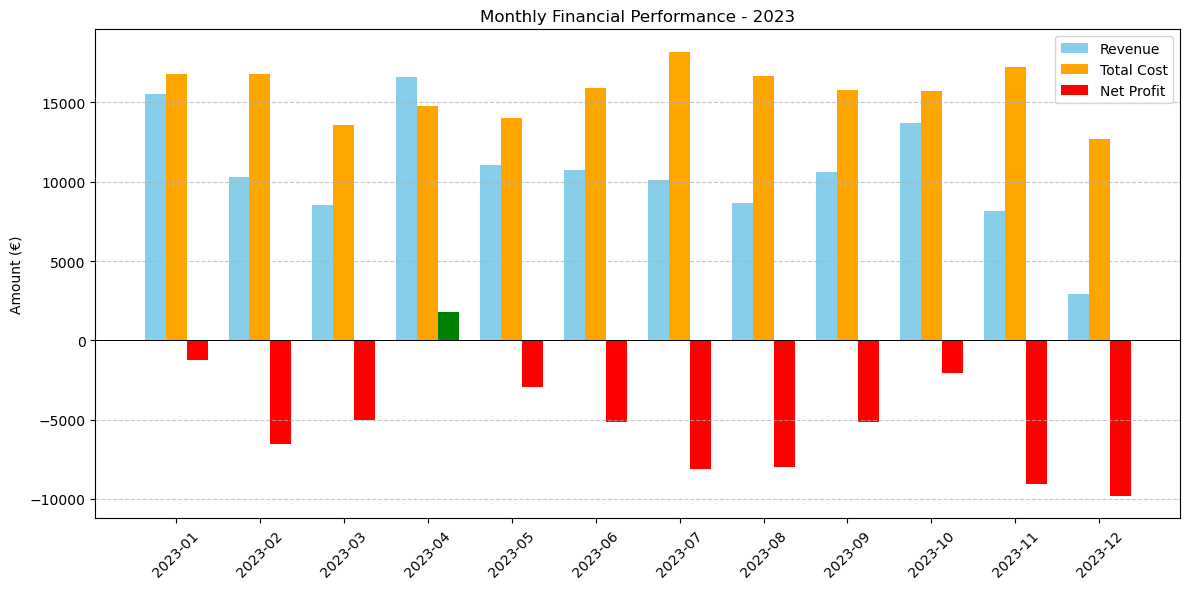

In [564]:
import matplotlib.pyplot as plt

# Create color list for net profit bars
net_profit_colors = ['green' if val > 0 else 'red' for val in monthly_summary['net_profit']]

# Replot with conditional coloring for net profit
plt.figure(figsize=(12, 6))
w = 0.25
x = np.arange(len(monthly_summary))

plt.bar(x - w, monthly_summary['amount'], w, label='Revenue', color='skyblue')
plt.bar(x, monthly_summary['total_cost'], w, label='Total Cost', color='orange')
plt.bar(x + w, monthly_summary['net_profit'], w, label='Net Profit', color=net_profit_colors)

plt.xticks(x, monthly_summary['month'].astype(str), rotation=45)
plt.ylabel('Amount (€)')
plt.title('Monthly Financial Performance - 2023')
plt.axhline(0, color='black', linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


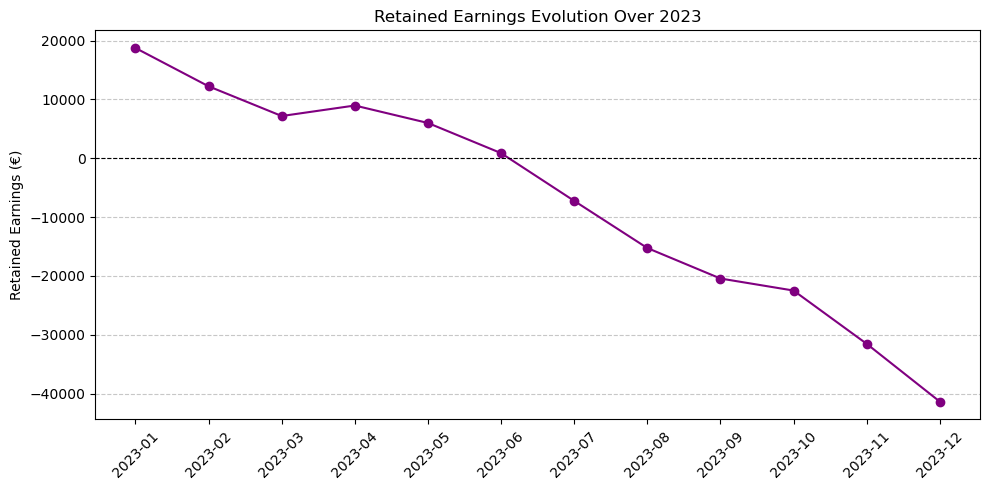

In [572]:
# Let's simulate the evolution of retained earnings over time starting from an initial capital
retained_earnings_color = ['green' if val > 0 else 'red' for val in monthly_summary['retained_earnings']]

initial_equity = 20000  # Starting retained earnings or equity
monthly_summary['retained_earnings'] = monthly_summary['net_profit'].cumsum() + initial_equity

# Plot retained earnings over time
plt.figure(figsize=(10, 5))
plt.plot(monthly_summary['month'].astype(str), monthly_summary['retained_earnings'], marker='o', color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(rotation=45)
plt.ylabel('Retained Earnings (€)')
plt.title('Retained Earnings Evolution Over 2023')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [574]:
import pandas as pd
import numpy as np

# Simulate a dataset with missing values

data = {
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve'],
    'age': [25, np.nan, 30, 22, np.nan],
    'department': ['HR', 'IT', 'Finance', None, 'Marketing'],
    'salary': [50000, 60000, np.nan, 52000, 58000]
}
df_missing = pd.DataFrame(data)
df_missing

,name,age,department,salary
0,Alice,25.0,HR,50000.0
1,Bob,NaN,IT,60000.0
2,Charlie,30.0,Finance,NaN
3,Diana,22.0,None,52000.0
4,Eve,NaN,Marketing,58000.0


In [584]:
df_missing.fillna('-')

,name,age,department,salary
0,Alice,25.0,HR,50000.0
1,Bob,-,IT,60000.0
2,Charlie,30.0,Finance,-
3,Diana,22.0,-,52000.0
4,Eve,-,Marketing,58000.0


In [616]:
df_duplicates = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Alice', 'Diana', 'Bob'],
    'age': [25, 30, 25, 22, 30],
    'department': ['HR', 'IT', 'HR', 'Finance', 'IT']
})

In [630]:
df_duplicates.duplicated()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [632]:
df_duplicates.drop_duplicates()

,name,age,department
0,Alice,25,HR
1,Bob,30,IT
3,Diana,22,Finance


In [634]:
df_duplicates.duplicated().sum()


2

In [684]:
import pandas as pd

df_outliers = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace'],
    'score': [85, 90, 88, 92, 87, 95, 150]  # One obvious outlier!
})

# Calculating the quartiles

q1 = df_outliers['score'].quantile(0.25)
q3 = df_outliers['score'].quantile(0.75)
iqr = q3 - q1

# Limits

inferior_limit = q1 - 1.5 * iqr
superior_limit = q3 + 1.5 * iqr

# Replace outliers for NaN

df_outliers['score'] = df_outliers['score'].mask(
    (df_outliers['score'] < inferior_limit) | (df_outliers['score'] > superior_limit),
)
# Classification with bins 

bins = [0, 85, 95, 160]
labels = ['Low', 'Medium', 'High']

df_outliers['Classification'] = pd.cut(
    df_outliers['score'],
    bins=bins,
    labels=labels
)

df_outliers


,name,score,Classification
0,Alice,85.0,Low
1,Bob,90.0,Medium
2,Charlie,88.0,Medium
3,Diana,92.0,Medium
4,Eve,87.0,Medium
5,Frank,95.0,Medium
6,Grace,NaN,NaN


In [714]:
import pandas as pd

# Employee info

df_employees = pd.DataFrame({
    'id': [101, 102, 103, 104],
    'name': ['Alice', 'Bob', 'Charlie', 'Diana'],
    'department': ['HR', 'IT', 'Finance', 'IT']
})

# Salary records
df_salaries = pd.DataFrame({
    'employee_id': [101, 102, 105],
    'salary': [50000, 60000, 55000]
})

In [716]:
import pandas as pd

# Merge both tables

merged = pd.merge(df_employees, df_salaries, left_on='id', right_on='employee_id', how='left')
display(merged)

,id,name,department,employee_id,salary
0,101,Alice,HR,101.0,50000.0
1,102,Bob,IT,102.0,60000.0
2,103,Charlie,Finance,NaN,NaN
3,104,Diana,IT,NaN,NaN


In [720]:
merged.fillna('-')

,id,name,department,employee_id,salary
0,101,Alice,HR,101.0,50000.0
1,102,Bob,IT,102.0,60000.0
2,103,Charlie,Finance,-,-
3,104,Diana,IT,-,-


In [722]:
df_projects = pd.DataFrame({
    'project_id': [201, 202, 203, 204],
    'project_name': ['Website Revamp', 'App Launch', 'Data Migration', 'Security Upgrade'],
    'department': ['IT', 'IT', 'Finance', 'IT']
})

In [724]:
merged_projects = pd.merge(df_employees, df_projects, on='department', how='inner')
display(merged_projects)

,id,name,department,project_id,project_name
0,102,Bob,IT,201,Website Revamp
1,102,Bob,IT,202,App Launch
2,102,Bob,IT,204,Security Upgrade
3,103,Charlie,Finance,203,Data Migration
4,104,Diana,IT,201,Website Revamp
5,104,Diana,IT,202,App Launch
6,104,Diana,IT,204,Security Upgrade


In [736]:
merged_projects.groupby('project_name')['id'].nunique()

project_name
App Launch          2
Data Migration      1
Security Upgrade    2
Website Revamp      2
Name: id, dtype: int64

In [752]:
merge_merged_with_mergedprojects = pd.merge(merged, merged_projects, on='id', how='inner')
display(merge_merged_with_mergedprojects)

,id,name_x,department_x,employee_id,salary,name_y,department_y,project_id,project_name
0,102,Bob,IT,102.0,60000.0,Bob,IT,201,Website Revamp
1,102,Bob,IT,102.0,60000.0,Bob,IT,202,App Launch
2,102,Bob,IT,102.0,60000.0,Bob,IT,204,Security Upgrade
3,103,Charlie,Finance,NaN,NaN,Charlie,Finance,203,Data Migration
4,104,Diana,IT,NaN,NaN,Diana,IT,201,Website Revamp
5,104,Diana,IT,NaN,NaN,Diana,IT,202,App Launch
6,104,Diana,IT,NaN,NaN,Diana,IT,204,Security Upgrade


In [759]:
# Drop '_y' columns and rename the '_x' ones back to original names
cleaned = merge_merged_with_mergedprojects.drop(columns=['name_y', 'department_y'])
cleaned = cleaned.rename(columns={'name_x': 'name', 'department_x': 'department'})

display(cleaned)


,id,name,department,employee_id,salary,project_id,project_name
0,102,Bob,IT,102.0,60000.0,201,Website Revamp
1,102,Bob,IT,102.0,60000.0,202,App Launch
2,102,Bob,IT,102.0,60000.0,204,Security Upgrade
3,103,Charlie,Finance,NaN,NaN,203,Data Migration
4,104,Diana,IT,NaN,NaN,201,Website Revamp
5,104,Diana,IT,NaN,NaN,202,App Launch
6,104,Diana,IT,NaN,NaN,204,Security Upgrade


In [761]:
import pandas as pd

df_scores = pd.DataFrame({
    'student': ['Alice', 'Bob', 'Charlie'],
    'math': [85, 90, 78],
    'science': [92, 88, 84],
    'history': [75, 85, 80]
})

display(df_scores)

,student,math,science,history
0,Alice,85,92,75
1,Bob,90,88,85
2,Charlie,78,84,80


In [767]:
melted = pd.melt(df_scores, id_vars='student', var_name='subject', value_name='score')
melted

,student,subject,score
0,Alice,math,85
1,Bob,math,90
2,Charlie,math,78
3,Alice,science,92
4,Bob,science,88
5,Charlie,science,84
6,Alice,history,75
7,Bob,history,85
8,Charlie,history,80


In [771]:
melted.groupby('subject')['score'].mean()


subject
history    80.000000
math       84.333333
science    88.000000
Name: score, dtype: float64

In [781]:
pivot = pd.pivot(
    melted,
    index='student',
    columns='subject',
    values='score')
pivot

subject,history,math,science
student,,,
Alice,75,85,92
Bob,85,90,88
Charlie,80,78,84


In [783]:
pivot.stack()

student  subject
Alice    history    75
         math       85
         science    92
Bob      history    85
         math       90
         science    88
Charlie  history    80
         math       78
         science    84
dtype: int64

In [785]:
pivot.unstack()

subject  student
history  Alice      75
         Bob        85
         Charlie    80
math     Alice      85
         Bob        90
         Charlie    78
science  Alice      92
         Bob        88
         Charlie    84
dtype: int64

In [787]:
import pandas as pd

df_preferences = pd.DataFrame({
    'student': ['Alice', 'Alice', 'Bob', 'Bob', 'Charlie', 'Charlie', 'Charlie'],
    'subject': ['Math', 'History', 'Math', 'Science', 'Science', 'History', 'Math']
})


In [791]:
df_preferences.groupby('subject')['student'].size()

subject
History    2
Math       3
Science    2
Name: student, dtype: int64

In [797]:
pd.crosstab(df_preferences['student'], df_preferences['subject'], margins=True)

subject,History,Math,Science,All
student,,,,
Alice,1,1,0,2
Bob,0,1,1,2
Charlie,1,1,1,3
All,2,3,2,7
